In [169]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from category_encoders import TargetEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn import preprocessing

## Q-1: Load the dataset and print the metadata in the notebook. 

In [170]:
dataset = pd.read_csv('loan_data.csv')

In [171]:
dataset.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [172]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [173]:
dataset.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [174]:
dataset.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

## Q-2: Create a countplot using sns showing the counts of loans by purpose,  with the color hue defined by not.fully.paid.

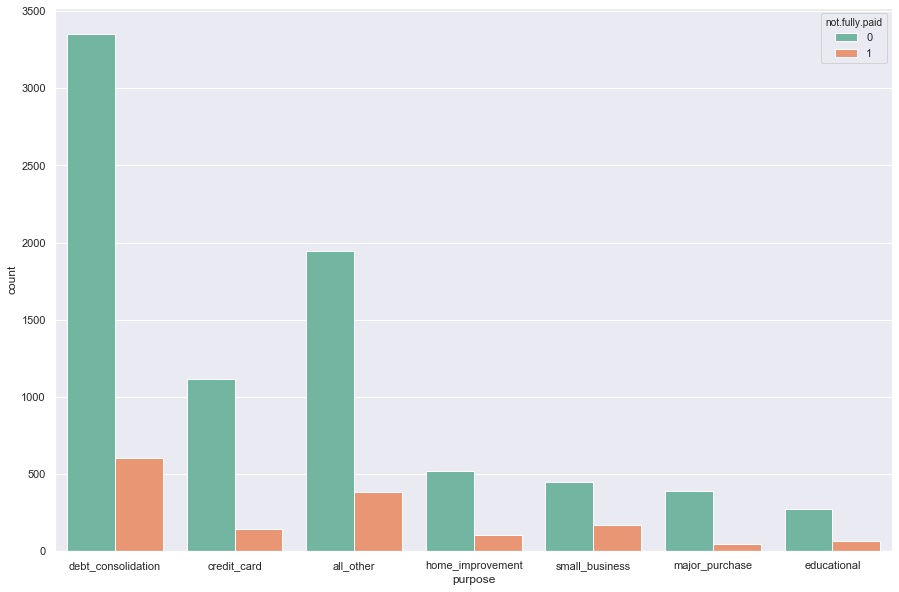

In [175]:
sns.set(rc={'figure.figsize':(15, 10)})
sns.countplot(x="purpose", hue='not.fully.paid', data=dataset, palette="Set2")

## Q-3: Print a heatmap to check NULL values.

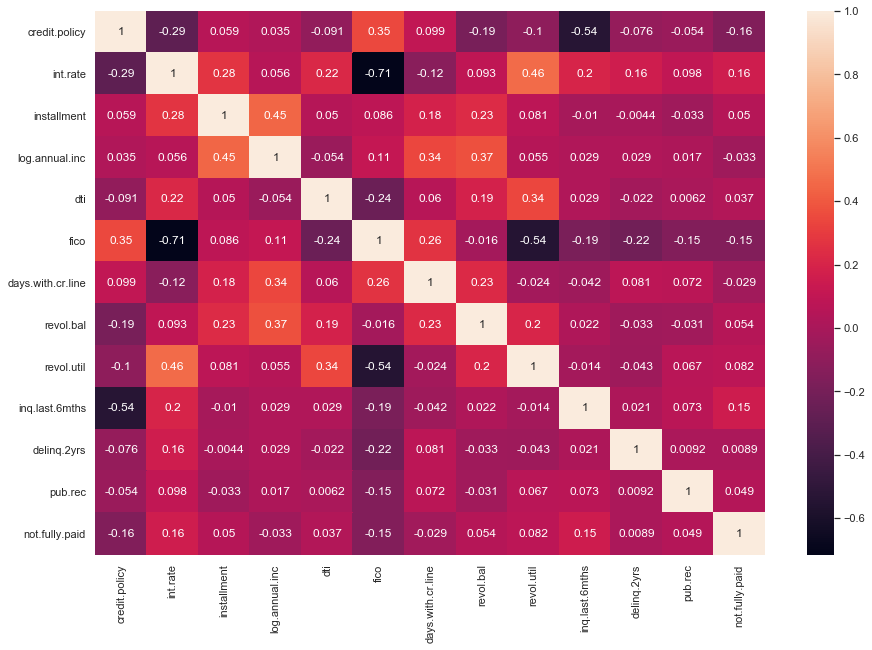

In [176]:
corr = dataset.corr()
sns.heatmap(corr, annot=True)

In [177]:
encoder = TargetEncoder()
dataset['purpose'] = encoder.fit_transform(dataset['purpose'], dataset['not.fully.paid'])

In [178]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [179]:
minmax_scale = preprocessing.MinMaxScaler().fit(X.iloc[:,:])
X.iloc[:,:] = minmax_scale.transform(X.iloc[:,:])

In [180]:
X

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,1.0,0.242912,0.376598,0.879888,0.544762,0.650200,0.581395,0.312754,0.023898,0.437815,0.000000,0.000000,0.0
1,1.0,0.021487,0.301151,0.229916,0.506334,0.476969,0.441860,0.147818,0.027848,0.644538,0.000000,0.000000,0.0
2,1.0,0.242912,0.484015,0.379883,0.404820,0.388184,0.325581,0.259495,0.002908,0.215126,0.030303,0.000000,0.0
3,1.0,0.242912,0.260870,0.158653,0.544762,0.270360,0.465116,0.144379,0.027885,0.615126,0.030303,0.000000,0.0
4,1.0,0.021487,0.528133,0.094378,0.537503,0.499666,0.255814,0.222613,0.003926,0.331933,0.000000,0.076923,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0.0,0.325179,0.550512,0.355977,0.663709,0.346796,0.279070,0.589602,0.178383,0.689916,0.060606,0.000000,0.0
9574,0.0,0.325179,0.417519,0.261804,0.514888,0.007009,0.511628,0.240596,0.000152,0.009244,0.151515,0.000000,0.0
9575,0.0,0.242912,0.301151,0.088851,0.436785,0.436916,0.348837,0.187337,0.008312,0.696639,0.242424,0.000000,0.0
9576,0.0,0.349845,0.639386,0.363354,0.468750,0.640187,0.372093,0.092838,0.000000,0.026891,0.151515,0.000000,0.0


In [181]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   float64
 1   purpose            9578 non-null   float64
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   float64
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   float64
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   float64
 11  delinq.2yrs        9578 non-null   float64
 12  pub.rec            9578 non-null   float64
dtypes: float64(13)
memory usage: 972.9 KB


In [182]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9573    1
9574    1
9575    1
9576    1
9577    1
Name: not.fully.paid, Length: 9578, dtype: int64

In [183]:
dataset['purpose'].value_counts()

0.152388    3957
0.166023    2331
0.115689    1262
0.170111     629
0.277868     619
0.112128     437
0.201166     343
Name: purpose, dtype: int64

In [184]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9573    1
9574    1
9575    1
9576    1
9577    1
Name: not.fully.paid, Length: 9578, dtype: int64

## Q-4: Perform startified splitting of train and test data. 

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

## Q-5: Build a classifier model using Decision Tree algorithm and plot the  same. 

In [186]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

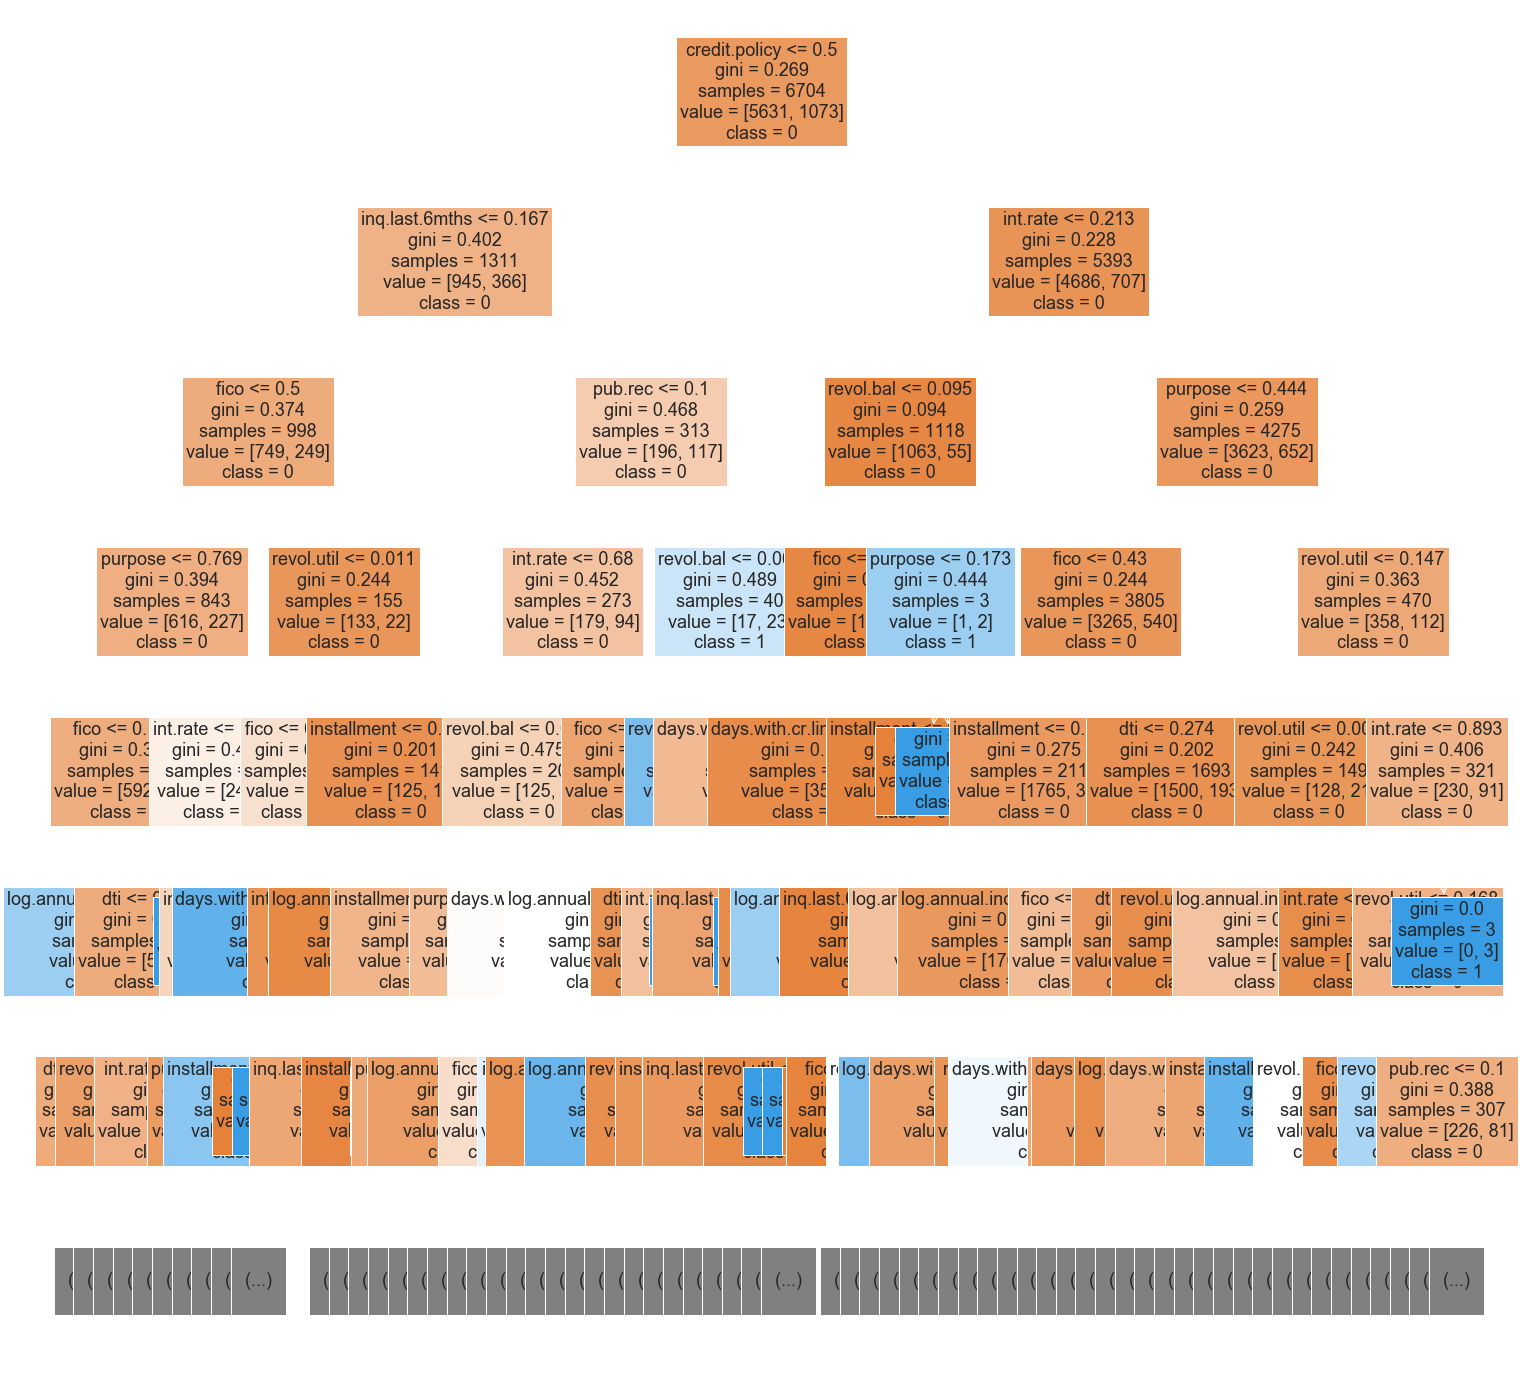

In [187]:
plt.figure(figsize=(25,25))
tree.plot_tree(classifier, filled=True, max_depth=6, feature_names=X.columns,class_names=['0','1'],fontsize=18)
plt.show()

In [191]:
from sklearn.metrics import confusion_matrix, classification_report
predictions = classifier.predict(X_test)
print(confusion_matrix(y_test, predictions))

[[1999  415]
 [ 349  111]]


## Q-6: Print classification report. 

In [194]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2414
           1       0.21      0.24      0.23       460

    accuracy                           0.73      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.75      0.73      0.74      2874



## Q-7: Find out the stratified cross validation accuracy 

In [197]:
from sklearn.model_selection import cross_val_score

In [198]:
scores = cross_val_score(classifier, X, y, cv=9)

In [199]:
scores

array([0.73802817, 0.74835681, 0.74154135, 0.76973684, 0.75469925,
       0.74906015, 0.75469925, 0.63815789, 0.48402256])

In [200]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.71 (+/- 0.17)
